<h1 style='color:rgba(200, 0, 0, 0.85);padding:40px 20px;text-align:center;font-size:45px;font-weight:bold'><center>IPL EDA 📊</center></h1>

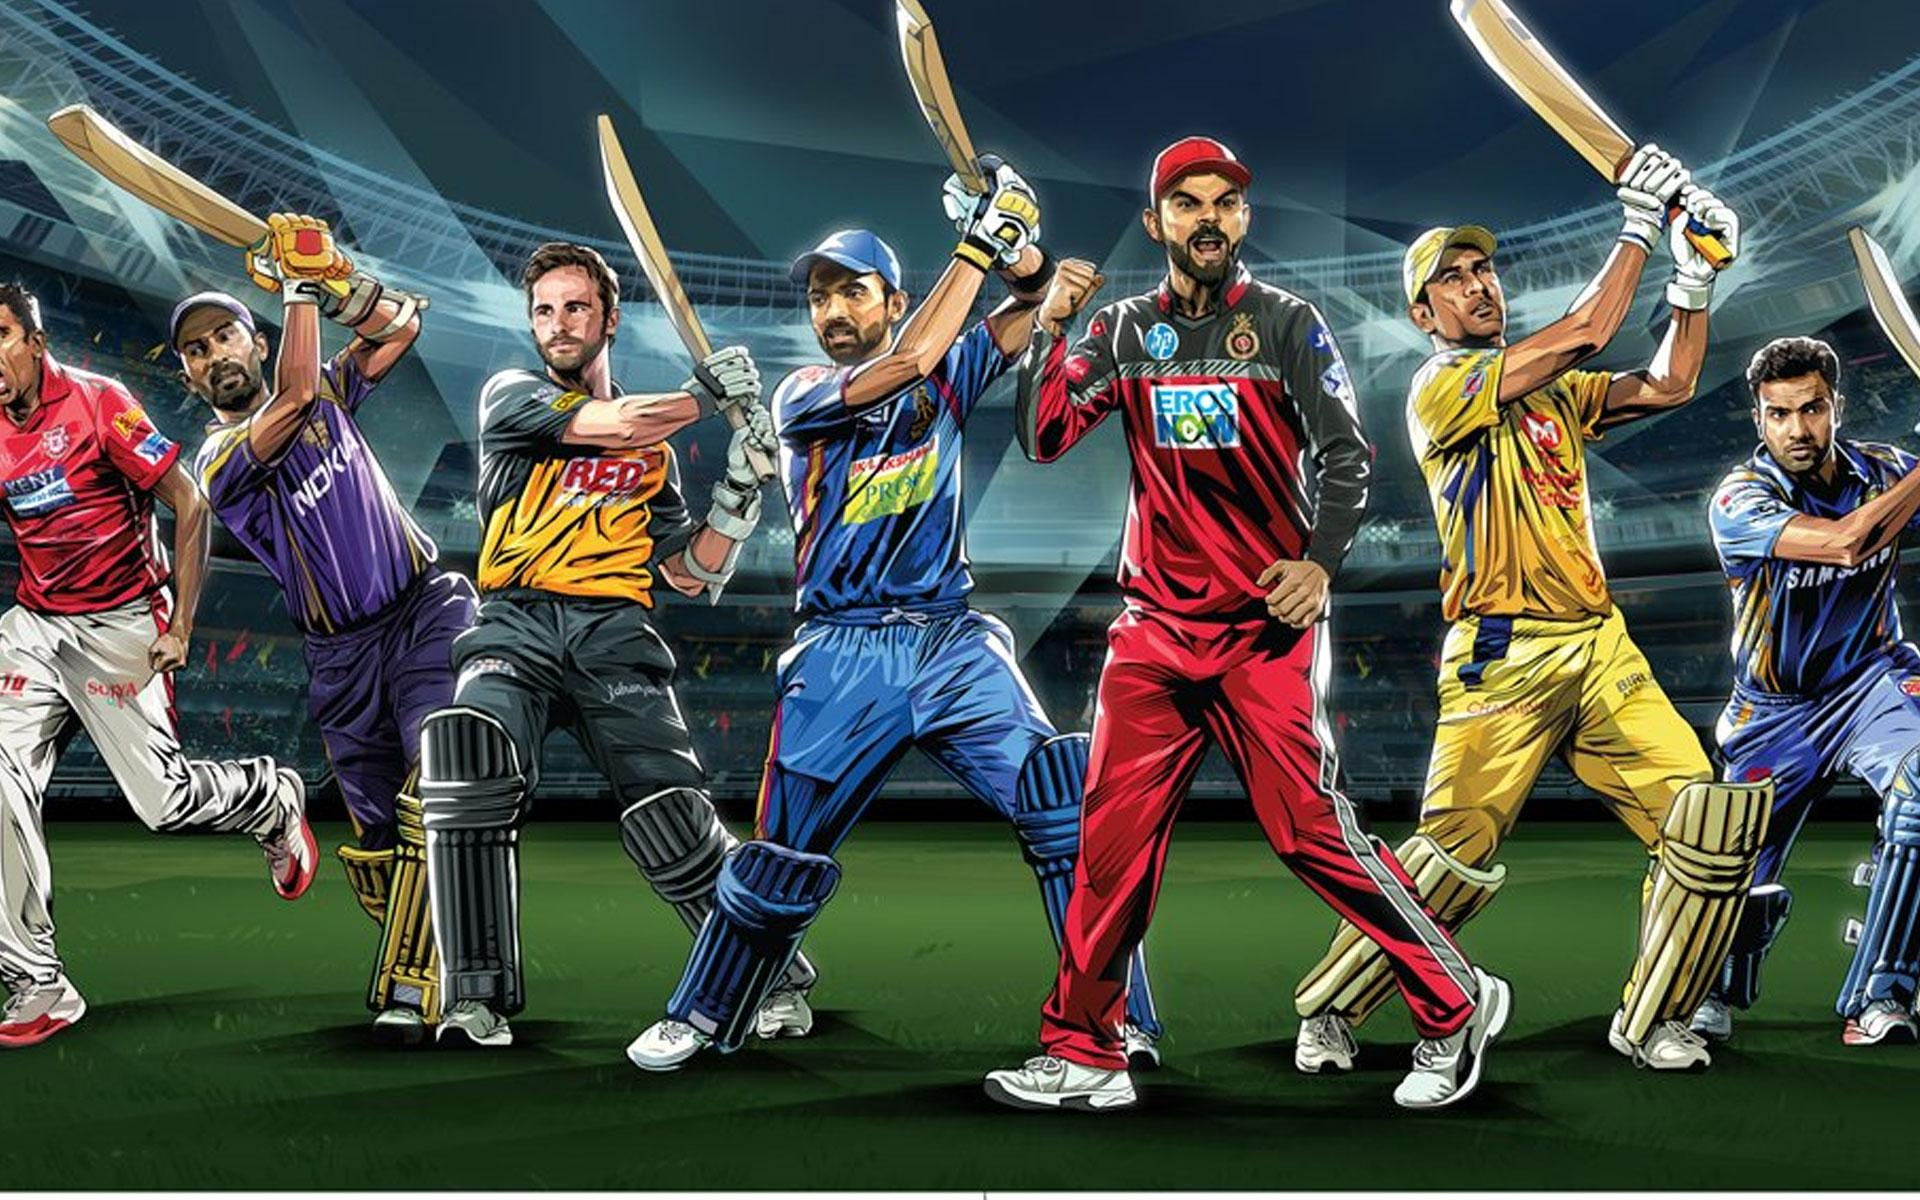

### AIM

To analyse the data of IPL from past 10 years.

### Import the required libraries

In [6]:
pip install geopandas

     ---------------------------------------- 1.1/1.1 MB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 6.1/6.1 MB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 22.7/22.7 MB 3.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import matplotlib.pyplot as plt
import geopandas as gpd

### Let us read the data from the csv file

In [2]:
IPL=pd.read_csv("E:\IPL.csv")

In [3]:
IPL

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi


#### We will print top few rows to understand about the various data columns


In [4]:
IPL.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


#### Size of data frame

In [5]:
print (IPL.shape)

(816, 17)


In [6]:
IPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

#### Let us understand about the basic information of the data, like min, max, mean and standard deviation etc.¶

In [7]:
IPL.describe()

,id,neutral_venue,result_margin
count,8.160000e+02,816.000000,799.000000
mean,7.563496e+05,0.094363,17.321652
std,3.058943e+05,0.292512,22.068427
min,3.359820e+05,0.000000,1.000000
25%,5.012278e+05,0.000000,6.000000
50%,7.292980e+05,0.000000,8.000000
75%,1.082626e+06,0.000000,19.500000
max,1.237181e+06,1.000000,146.000000


#### Let us check for any missing values

In [8]:
IPL.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

Here we observed that null values are present in some columns.

In [44]:
IPL['city']=IPL['city'].fillna("unknown")

In [45]:
IPL['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', 'unknown', 'Rajkot', 'Kanpur', 'Dubai', 'Sharjah'],
      dtype=object)

In [11]:
IPL['result_margin']=IPL['result_margin'].fillna("unknown")

In [12]:
IPL['eliminator'].unique()

array(['N', 'Y', nan], dtype=object)

In [13]:

IPL['eliminator']=IPL['eliminator'].fillna("no result")

In [14]:
IPL.drop(['method'],axis=1,inplace=True)
IPL

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,unknown,Y,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,PR Reiffel,S Ravi


In [15]:
IPL.isnull().sum()

id                 0
city               0
date               0
player_of_match    4
venue              0
neutral_venue      0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             4
result             4
result_margin      0
eliminator         0
umpire1            0
umpire2            0
dtype: int64

In [16]:
IPL['player_of_match'].unique()

array(['BB McCullum', 'MEK Hussey', 'MF Maharoof', 'MV Boucher',
       'DJ Hussey', 'SR Watson', 'V Sehwag', 'ML Hayden', 'YK Pathan',
       'KC Sangakkara', 'JDP Oram', 'AC Gilchrist', 'SM Katich',
       'MS Dhoni', 'ST Jayasuriya', 'GD McGrath', 'SE Marsh',
       'SA Asnodkar', 'R Vinay Kumar', 'IK Pathan', 'SM Pollock',
       'Sohail Tanvir', 'S Sreesanth', 'A Nehra', 'SC Ganguly',
       'CRD Fernando', 'L Balaji', 'Shoaib Akhtar', 'A Mishra',
       'DPMD Jayawardene', 'GC Smith', 'DJ Bravo', 'M Ntini',
       'SP Goswami', 'A Kumble', 'KD Karthik', 'JA Morkel', 'P Kumar',
       'Umar Gul', 'SK Raina', 'SR Tendulkar', 'R Dravid', 'DL Vettori',
       'RP Singh', 'M Muralitharan', 'CH Gayle', 'AB de Villiers',
       'RS Bopara', 'PP Ojha', 'TM Dilshan', 'HH Gibbs', 'DP Nannes',
       'JP Duminy', 'Yuvraj Singh', 'SB Jakati', 'JH Kallis', 'G Gambhir',
       'RG Sharma', 'A Singh', 'S Badrinath', 'DR Smith', 'LRPL Taylor',
       'Harbhajan Singh', 'R Bhatia', 'SK Warne', 'B

In [17]:
IPL['player_of_match']=IPL['player_of_match'].fillna("unknown")

In [18]:
IPL['winner'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Pune Warriors', 'Kochi Tuskers Kerala', nan,
       'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [19]:
IPL['winner']=IPL['winner'].fillna("unknown")

In [20]:
IPL['result'].unique()

array(['runs', 'wickets', 'tie', nan], dtype=object)

In [21]:
IPL['result']=IPL['result'].fillna("no result")

In [22]:
IPL.isnull().sum()

id                 0
city               0
date               0
player_of_match    0
venue              0
neutral_venue      0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
eliminator         0
umpire1            0
umpire2            0
dtype: int64

In [46]:
IPL['city'].value_counts()

Mumbai            101
Bangalore          80
Kolkata            77
Delhi              74
Hyderabad          64
Chennai            57
Chandigarh         56
Jaipur             47
Pune               38
Abu Dhabi          29
Dubai              26
Durban             15
unknown            13
Visakhapatnam      13
Ahmedabad          12
Sharjah            12
Centurion          12
Rajkot             10
Dharamsala          9
Indore              9
Johannesburg        8
Cuttack             7
Cape Town           7
Ranchi              7
Port Elizabeth      7
Raipur              6
Kochi               5
Kanpur              4
East London         3
Kimberley           3
Nagpur              3
Bloemfontein        2
Name: city, dtype: int64

In [47]:

IPL.replace(to_replace='Bengaluru',value='Bangalore',inplace=True)
IPL['city'].value_counts()

Mumbai            101
Bangalore          80
Kolkata            77
Delhi              74
Hyderabad          64
Chennai            57
Chandigarh         56
Jaipur             47
Pune               38
Abu Dhabi          29
Dubai              26
Durban             15
unknown            13
Visakhapatnam      13
Ahmedabad          12
Sharjah            12
Centurion          12
Rajkot             10
Dharamsala          9
Indore              9
Johannesburg        8
Cuttack             7
Cape Town           7
Ranchi              7
Port Elizabeth      7
Raipur              6
Kochi               5
Kanpur              4
East London         3
Kimberley           3
Nagpur              3
Bloemfontein        2
Name: city, dtype: int64

In [48]:
IPL['team1'].value_counts()

Royal Challengers Bangalore    108
Delhi Capitals                 102
Mumbai Indians                  97
Kolkata Knight Riders           95
Chennai Super Kings             94
Kings XI Punjab                 92
Rajasthan Royals                70
Sunrisers Hyderabad             59
Deccan Chargers                 39
Pune Warriors                   23
Gujarat Lions                   16
Rising Pune Supergiant          14
Kochi Tuskers Kerala             7
Name: team1, dtype: int64

In [49]:
IPL.replace(to_replace='Delhi Daredevils',value='Delhi Capitals',inplace=True)
IPL['team1'].value_counts()

Royal Challengers Bangalore    108
Delhi Capitals                 102
Mumbai Indians                  97
Kolkata Knight Riders           95
Chennai Super Kings             94
Kings XI Punjab                 92
Rajasthan Royals                70
Sunrisers Hyderabad             59
Deccan Chargers                 39
Pune Warriors                   23
Gujarat Lions                   16
Rising Pune Supergiant          14
Kochi Tuskers Kerala             7
Name: team1, dtype: int64

In [50]:
IPL.replace(to_replace='Rising Pune Supergiants',value='Rising Pune Supergiant',inplace=True)
IPL['team1'].value_counts()

Royal Challengers Bangalore    108
Delhi Capitals                 102
Mumbai Indians                  97
Kolkata Knight Riders           95
Chennai Super Kings             94
Kings XI Punjab                 92
Rajasthan Royals                70
Sunrisers Hyderabad             59
Deccan Chargers                 39
Pune Warriors                   23
Gujarat Lions                   16
Rising Pune Supergiant          14
Kochi Tuskers Kerala             7
Name: team1, dtype: int64

In [51]:
IPL['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi Capitals',
       'Mumbai Indians', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Deccan Chargers', 'Chennai Super Kings', 'Kochi Tuskers Kerala',
       'Pune Warriors', 'Sunrisers Hyderabad', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [52]:
IPL['team2'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Deccan Chargers',
       'Kings XI Punjab', 'Delhi Capitals', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Gujarat Lions'], dtype=object)

Here we have bangalore is two diffrent so they are replaced by single term,similarly team delhi captials and Rising pune supergiant so have two diffrent name and hence even that we have changed by replace function.

### City where most of the matches played

<Axes: title={'center': 'city'}>

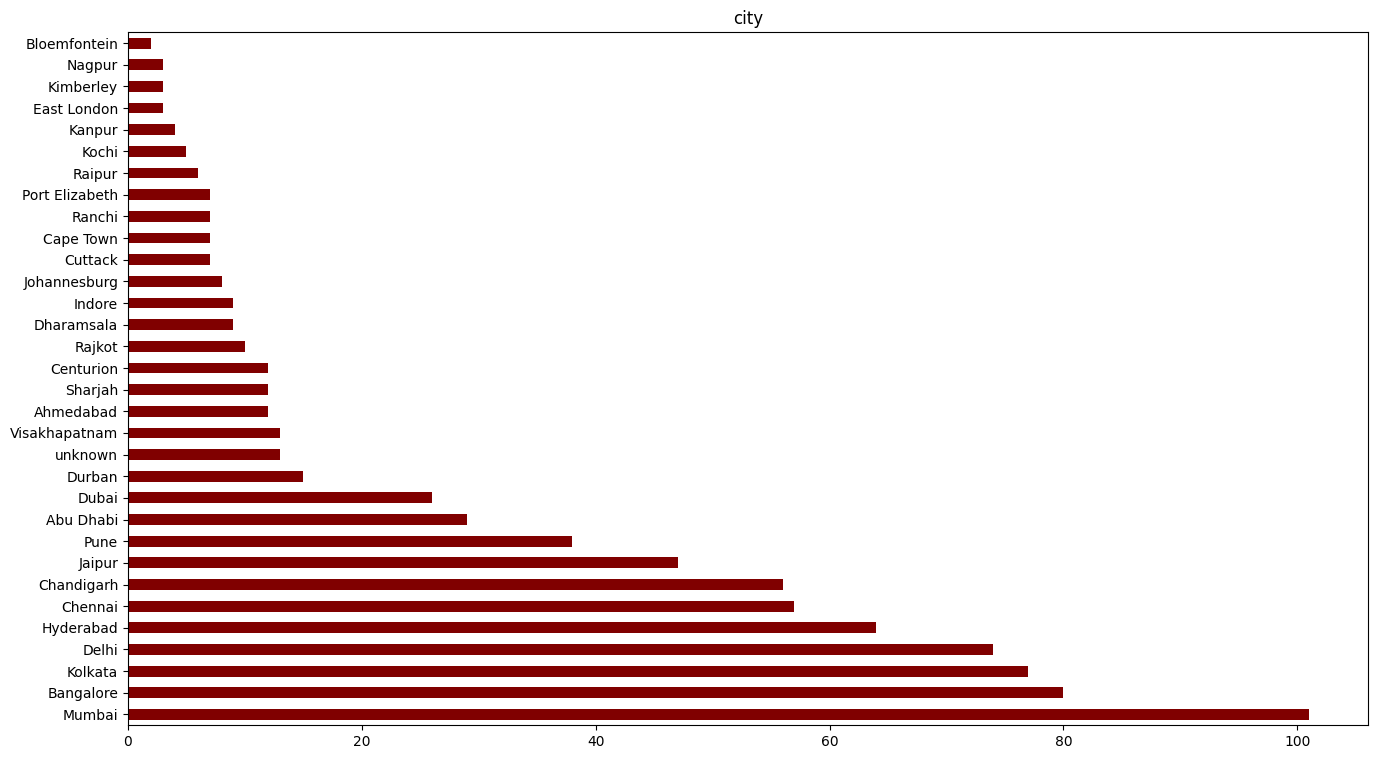

In [53]:
IPL['city'].value_counts().plot(kind = 'barh', title = 'city',color="maroon", figsize=(16,9))

From the plot we can say that more matches played in mumbai

### Venue where number of matches played.

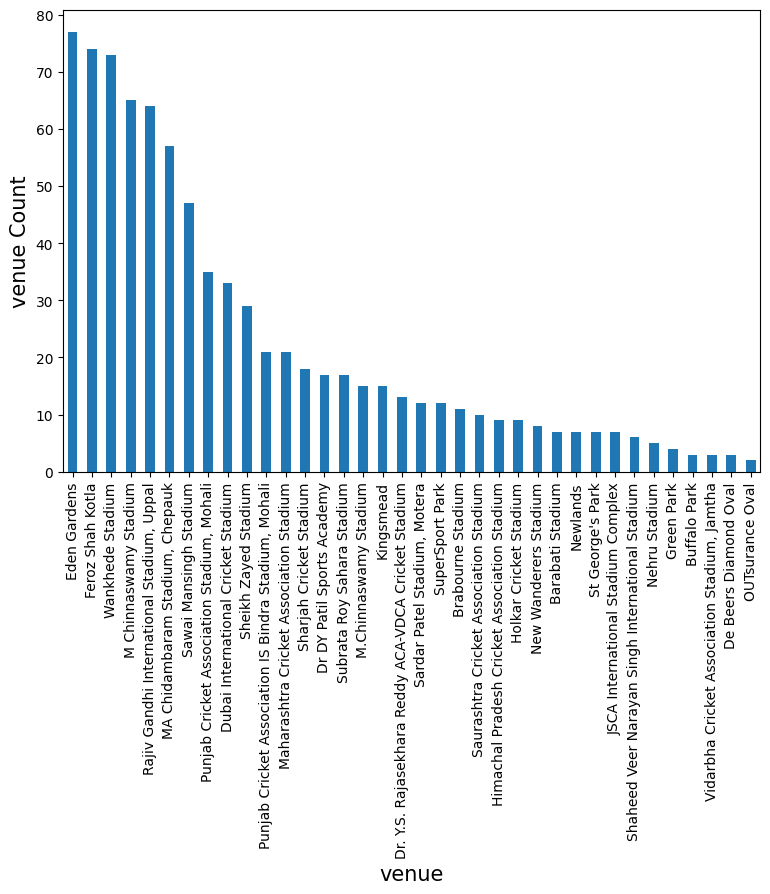

In [29]:
IPL['venue'].value_counts().plot(kind='bar', figsize=(9,6))
plt.xlabel("venue", fontsize=15)
plt.ylabel("venue Count", fontsize=15)
plt.show()

Fom the plot we can say that most of matches are played in Eden Gardens.

### Which team have won maximum number of matches in IPL 

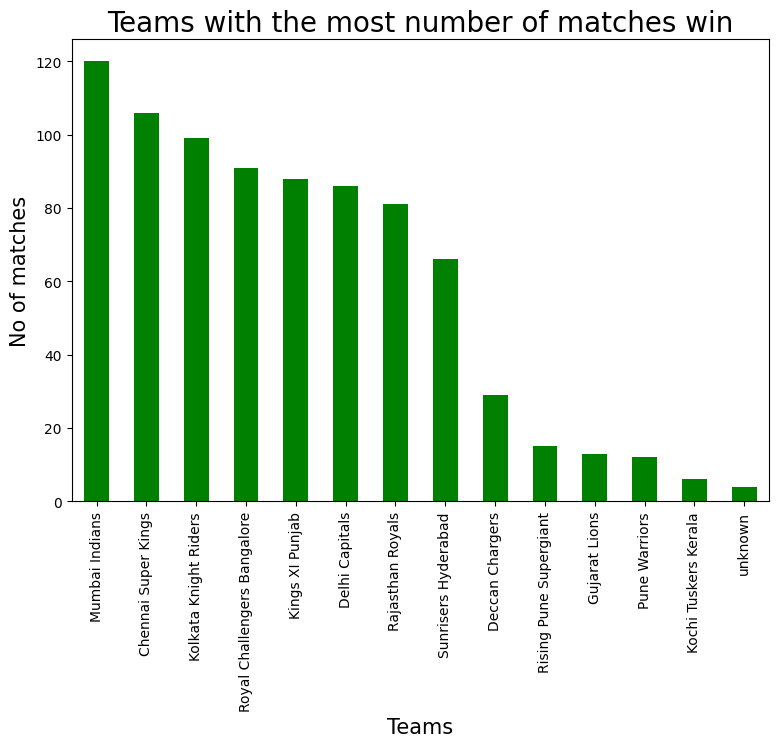

In [54]:
a=IPL.winner.value_counts()
plt.figure(figsize=(9,6))
a.plot(kind='bar',color='green')
plt.ylabel('No of matches', fontsize=15)
plt.xlabel("Teams", fontsize=15)
plt.title("Teams with the most number of matches win", fontsize=20)
plt.show()


From the plot we can say that in IPL MUMBAI INDIANS have won more time.

### Teams who choose fielding and batting

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Royal Challengers Bangalore'),
  Text(1, 0, 'Chennai Super Kings'),
  Text(2, 0, 'Rajasthan Royals'),
  Text(3, 0, 'Mumbai Indians'),
  Text(4, 0, 'Deccan Chargers'),
  Text(5, 0, 'Kings XI Punjab'),
  Text(6, 0, 'Kolkata Knight Riders'),
  Text(7, 0, 'Delhi Capitals'),
  Text(8, 0, 'Kochi Tuskers Kerala'),
  Text(9, 0, 'Pune Warriors'),
  Text(10, 0, 'Sunrisers Hyderabad'),
  Text(11, 0, 'Gujarat Lions'),
  Text(12, 0, 'Rising Pune Supergiant')])

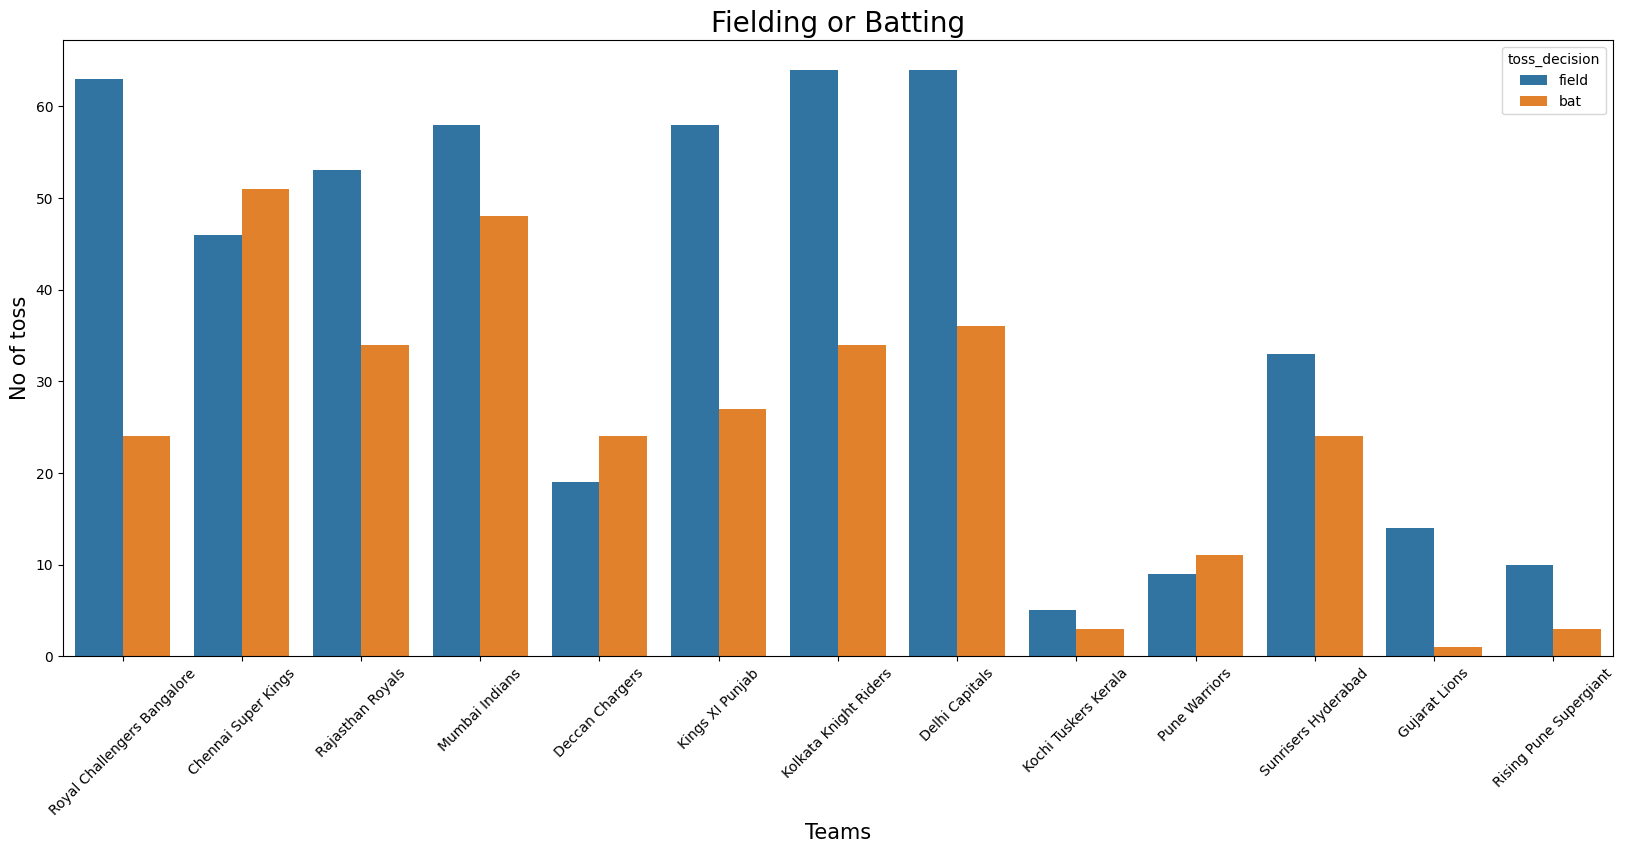

In [55]:
plt.figure(figsize=(20,8))
sns.countplot(x=IPL['toss_winner'],data=IPL,hue='toss_decision',orient='h')
plt.ylabel('No of toss', fontsize=15)
plt.xlabel("Teams", fontsize=15)
plt.title("Fielding or Batting", fontsize=20)
plt.xticks(rotation=45)


From plot we can say that royal challenger bangalore,kolkotta knight riders and Delhi capitals have choosen fielding many times compare to other teams.
similarly chennai super kings have choosed batting many times and rising pune supergiant has least fielding adn batting.

### Player of the match 

In [56]:
b=IPL["player_of_match"].value_counts()[:10]


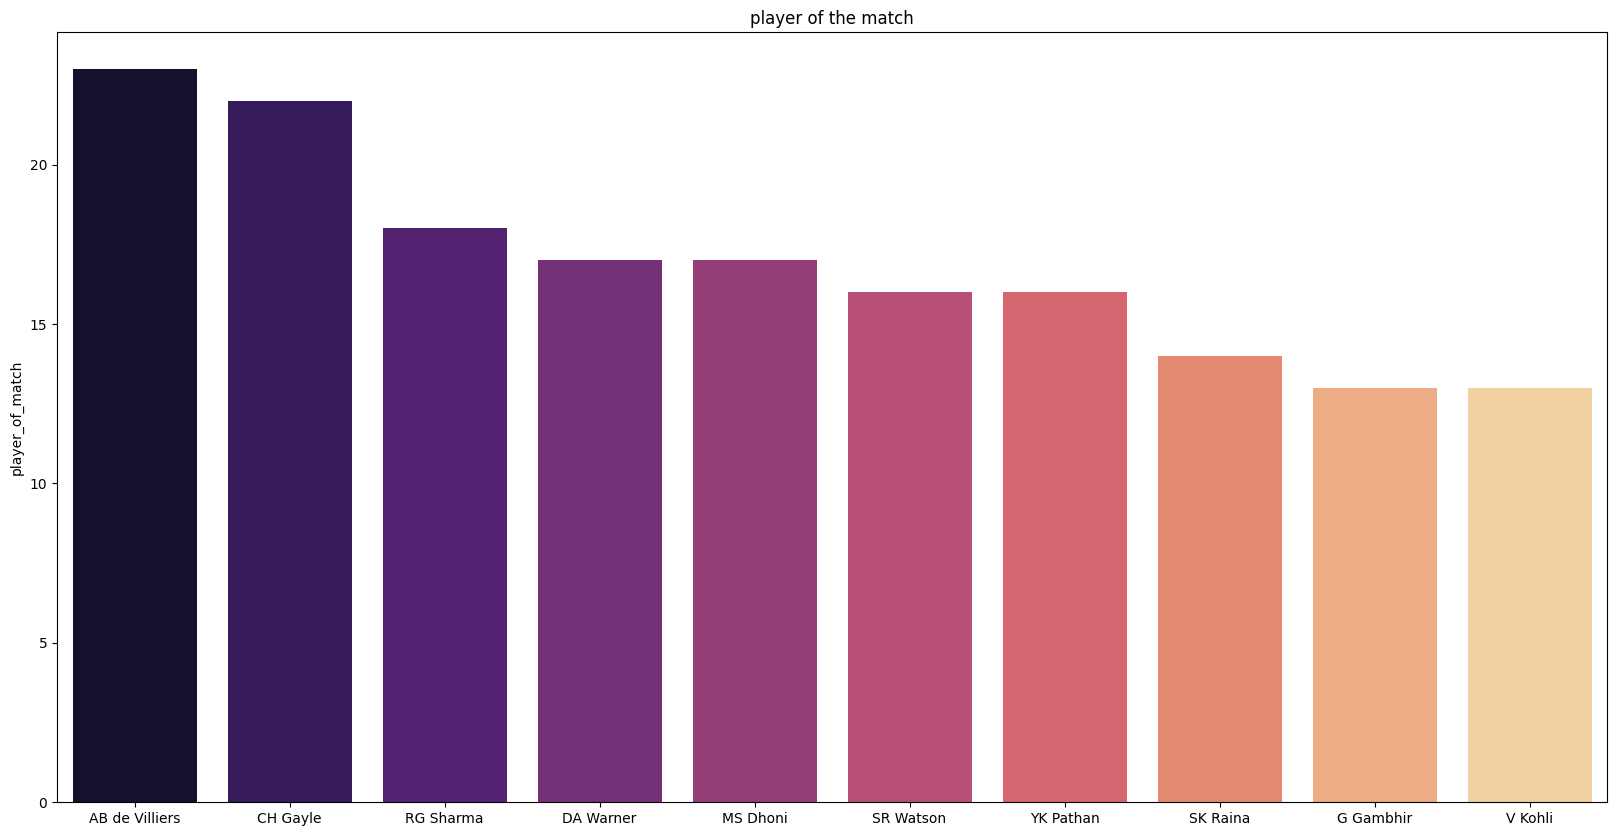

In [57]:
plt.figure(figsize=(20,10))
sns.barplot(x=b.index,y=b,palette='magma')
plt.title("player of the match")
plt.show()

We can say that AB de VILLiers have won maximum.

### Batting and Feilding 

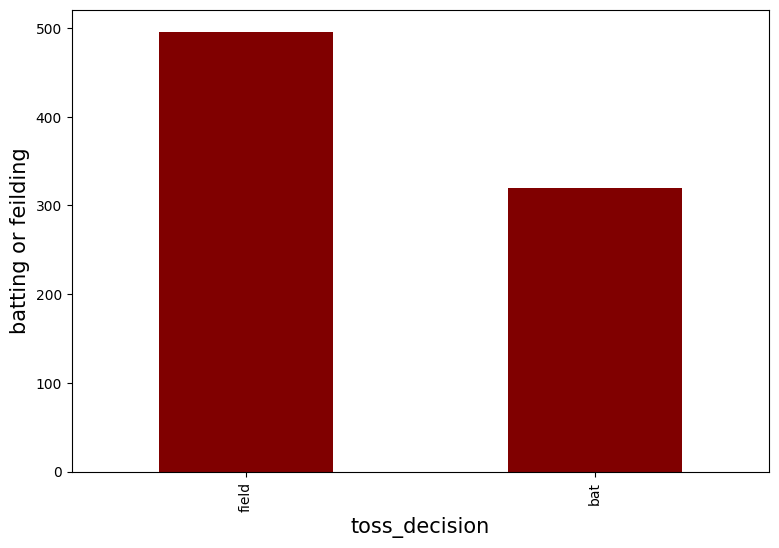

In [58]:
IPL['toss_decision'].value_counts().plot(kind='bar',color='maroon', figsize=(9,6))
plt.xlabel("toss_decision", fontsize=15)
plt.ylabel("batting or feilding", fontsize=15)
plt.show()

In [59]:
IPL['toss_decision'].value_counts()

field    496
bat      320
Name: toss_decision, dtype: int64

The above plot shows that teams has decided to choose fielding(496).

### Team who won toss many times.

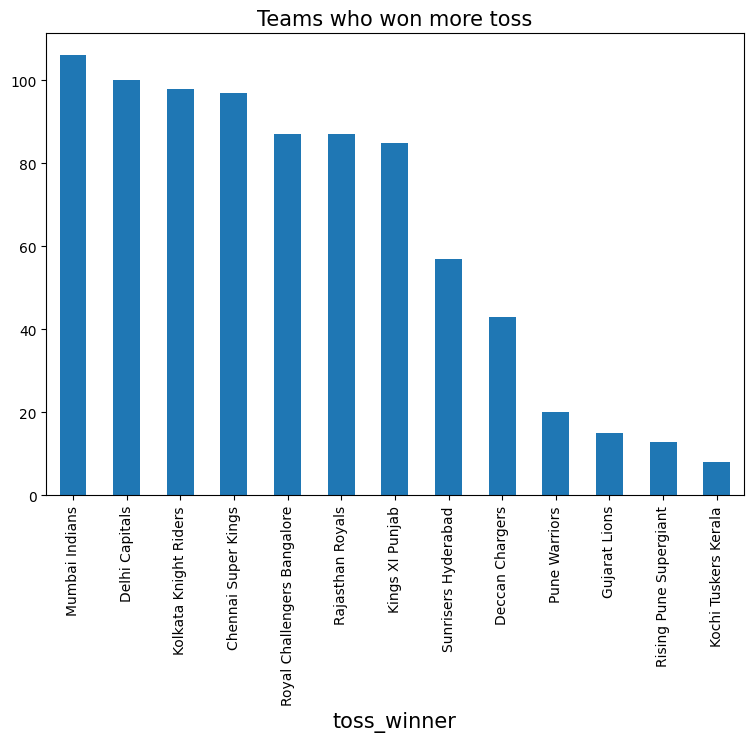

In [60]:
IPL['toss_winner'].value_counts().plot(kind='bar', figsize=(9,6))
plt.xlabel("toss_winner", fontsize=15)
plt.title("Teams who won more toss", fontsize=15)
plt.show()

We can say that mumbai indains have won more toss compare to other teams.

### Percentage of results. 

In [61]:
df=IPL.result.value_counts()

In [62]:
df

wickets      435
runs         364
tie           13
no result      4
Name: result, dtype: int64

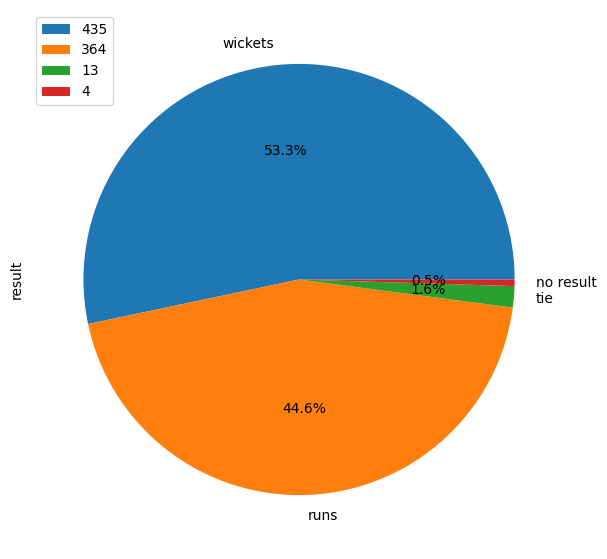

In [63]:
plt.figure(figsize=(15,7))
IPL['result'].value_counts().plot.pie(autopct='%1.1f%%')
plt.legend(IPL['result'].value_counts(),loc='upper left')

From the plot we can say almost 53% of matches are won by wickets and 45% percentage are won by runs and remaining 16% are tie.

### Result of particular Team 

In [64]:
ipl1=IPL[['team1','team2','winner','result','toss_winner']]
ipl1_df=IPL.winner=='Royal Challengers Bangalore'

In [65]:
ipl2=ipl1[ipl1_df]
ipl2_df=ipl2.sort_values(by=['winner'],ascending=False)
ipl2_df

,team1,team2,winner,result,toss_winner
3,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,wickets,Mumbai Indians
572,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,wickets,Royal Challengers Bangalore
564,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,wickets,Royal Challengers Bangalore
560,Royal Challengers Bangalore,Gujarat Lions,Royal Challengers Bangalore,runs,Gujarat Lions
555,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,runs,Kings XI Punjab
...,...,...,...,...,...
231,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,wickets,Royal Challengers Bangalore
228,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,wickets,Royal Challengers Bangalore
223,Royal Challengers Bangalore,Kochi Tuskers Kerala,Royal Challengers Bangalore,wickets,Kochi Tuskers Kerala
220,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,runs,Kings XI Punjab


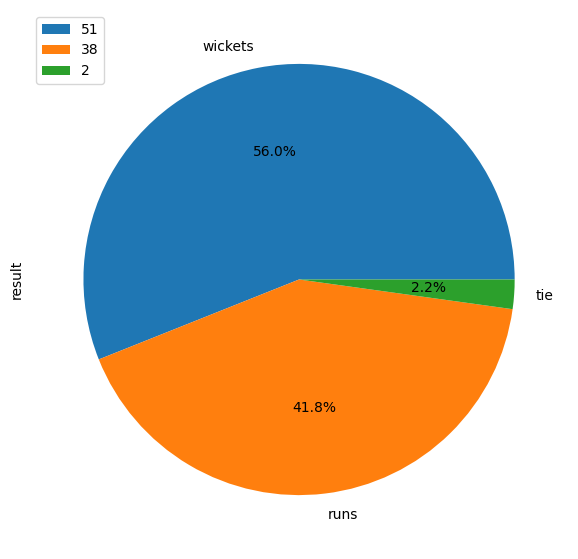

In [42]:
plt.figure(figsize=(15,7))
ipl2_df['result'].value_counts().plot.pie(autopct='%1.1f%%')
plt.legend(ipl2_df['result'].value_counts(),loc='upper left')

From the plot we can say that RCB have won 56% through wickets ,41% by runs and 2%tie.

### Match played by each team in IPL(2008_2020)

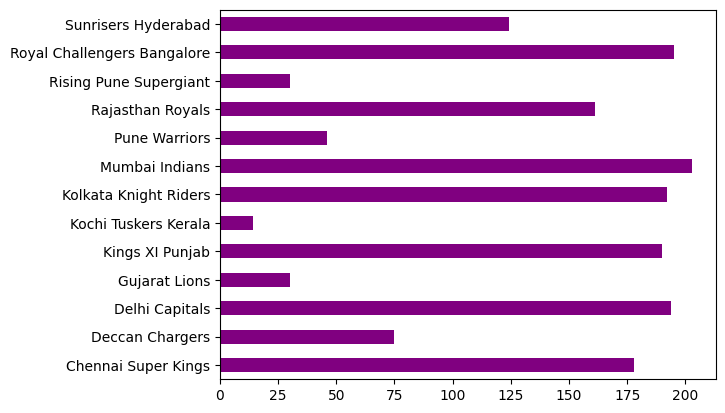

In [66]:
x=IPL["team1"].value_counts()
y=IPL["team2"].value_counts()
team=(x+y).plot(kind='barh',color='purple')

We count the value of each team playing in column one and add to the count of each team from team two to get the desired output. For example, if CSK played 90 times from team one and 85 times from team 2 then the total of175 matches are shown in the graph. You can see that Mumbai Indians played the highest number of matches in the IPL.

In [67]:
IPL['eliminator'].unique()

array(['N', 'Y', 'no result'], dtype=object)

In [68]:
df=IPL.eliminator.value_counts()

In [69]:
df

N            799
Y             13
no result      4
Name: eliminator, dtype: int64

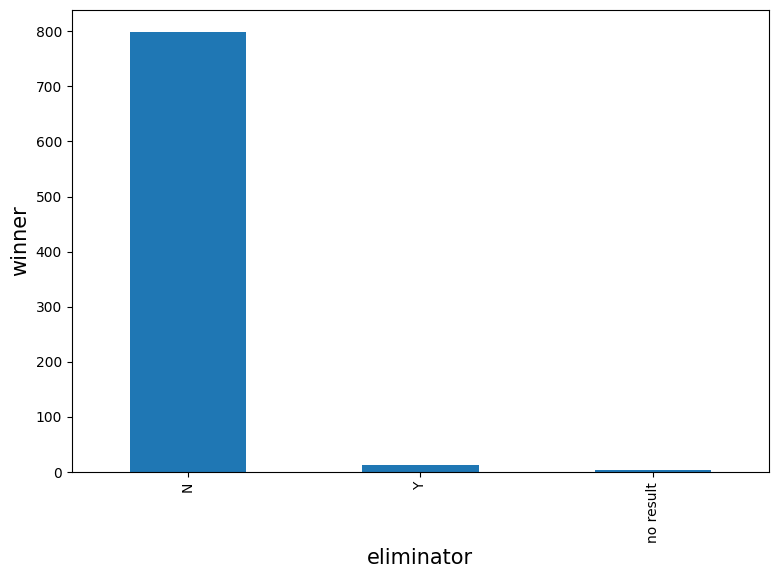

In [72]:
IPL['eliminator'].value_counts().plot(kind='bar', figsize=(9,6))
plt.xlabel("eliminator", fontsize=15)
plt.ylabel("", fontsize=15)
plt.show()

<img src="https://previews.123rf.com/images/kurtcan/kurtcan1504/kurtcan150400325/39257978-3d-the-end-text-on-white-background.jpg" width="700" height="850">